In [1]:
!pip install pandas numpy scikit-learn joblib seaborn matplotlib

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
true_df = pd.read_csv('/content/True.csv')
fake_df = pd.read_csv('/content/Fake.csv')

In [4]:
true_df['label'] = 1   # True news = 1
fake_df['label'] = 0   # Fake news = 0

In [5]:
df = pd.concat([true_df, fake_df], axis=0)
df = df.sample(frac=1).reset_index(drop=True)  # Shuffle dataset

In [8]:
from sklearn.model_selection import train_test_split

X = df['text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [10]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [11]:
y_pred = model.predict(X_test_tfidf)

In [12]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.9860133630289533

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5869
           1       0.98      0.99      0.99      5356

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



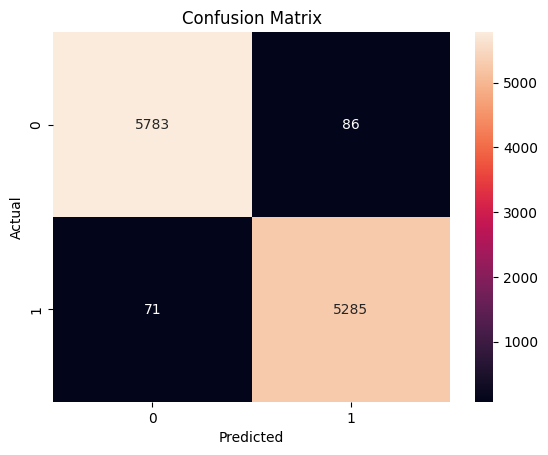

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [14]:
def predict_news(news):
    news_tfidf = vectorizer.transform([news])
    prediction = model.predict(news_tfidf)

    if prediction[0] == 1:
        return "Real News"
    else:
        return "Fake News"

In [15]:
predict_news("Government announces new economic policy today")

'Fake News'

In [16]:
predict_news("The Supreme Court on Monday delivered its verdict on the constitutional validity of the new taxation law passed by Parliament.")

'Real News'